# CHALLENGE
## SECTION: ANNs
### LECTURE: Multilayer ANNs
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [14]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

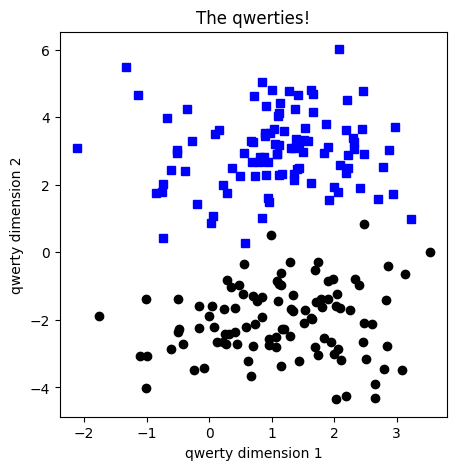

In [15]:
# create data

nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [16]:
class ANNClass(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(2,16)
        self.hidden0 = nn.Linear(16,1)
        self.output = nn.Linear(1,1)

    def forward(self, x):

        # x = F.relu(self.input(x))
        # x = F.relu(self.hidden0(x))
        # x = F.sigmoid(self.output(x))
        x = self.input(x)
        x = self.hidden0(x)
        x = F.sigmoid(self.output(x))

        return x


![image.png](ann.png)

In [17]:
def createANNmodel(learningRate):

    # model architecture
    # ANNclassify = nn.Sequential(
    #     nn.Linear(2,16),  # input layer
    #     # nn.ReLU(),        # activation unit
    #     nn.Linear(16,1),  # hidden layer
    #     # nn.ReLU(),        # activation unit
    #     nn.Linear(1,1),   # output unit
    #     nn.Sigmoid(),     # final activation unit
    # )
    ANNclassify = ANNClass()

    # loss function
    lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

    # model output
    return ANNclassify,lossfun,optimizer

In [18]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel, lossfun, optimizer, data, labels, numepochs=1000):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: Wasn't this ">0" previously?!?!
    totalacc = 100*torch.mean(((predictions>.5) == labels).float())

    return losses,predictions,totalacc

# Test the new code by running it once

Final accuracy: 99%


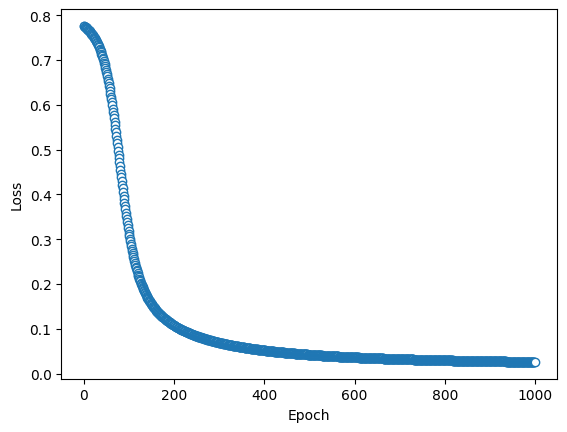

In [19]:
# create everything
ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify, lossfun, optimizer, data, labels, numepochs=numepochs)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Now for the real test (varying learning rates)

In [20]:
# learning rates
learningrates = np.linspace(.001,.1,50)

# initialize
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# the loop 
for i,lr in enumerate(learningrates):
  
  # create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify, lossfun, optimizer, data, labels, numepochs=numepochs)

  # store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()
  print(f'- pass {i+1} of {len(learningrates)}...')


- pass 1 of 50...
- pass 2 of 50...
- pass 3 of 50...
- pass 4 of 50...
- pass 5 of 50...
- pass 6 of 50...
- pass 7 of 50...
- pass 8 of 50...
- pass 9 of 50...
- pass 10 of 50...
- pass 11 of 50...
- pass 12 of 50...
- pass 13 of 50...
- pass 14 of 50...
- pass 15 of 50...
- pass 16 of 50...
- pass 17 of 50...
- pass 18 of 50...
- pass 19 of 50...
- pass 20 of 50...
- pass 21 of 50...
- pass 22 of 50...
- pass 23 of 50...
- pass 24 of 50...
- pass 25 of 50...
- pass 26 of 50...
- pass 27 of 50...
- pass 28 of 50...
- pass 29 of 50...
- pass 30 of 50...
- pass 31 of 50...
- pass 32 of 50...
- pass 33 of 50...
- pass 34 of 50...
- pass 35 of 50...
- pass 36 of 50...
- pass 37 of 50...
- pass 38 of 50...
- pass 39 of 50...
- pass 40 of 50...
- pass 41 of 50...
- pass 42 of 50...
- pass 43 of 50...
- pass 44 of 50...
- pass 45 of 50...
- pass 46 of 50...
- pass 47 of 50...
- pass 48 of 50...
- pass 49 of 50...
- pass 50 of 50...


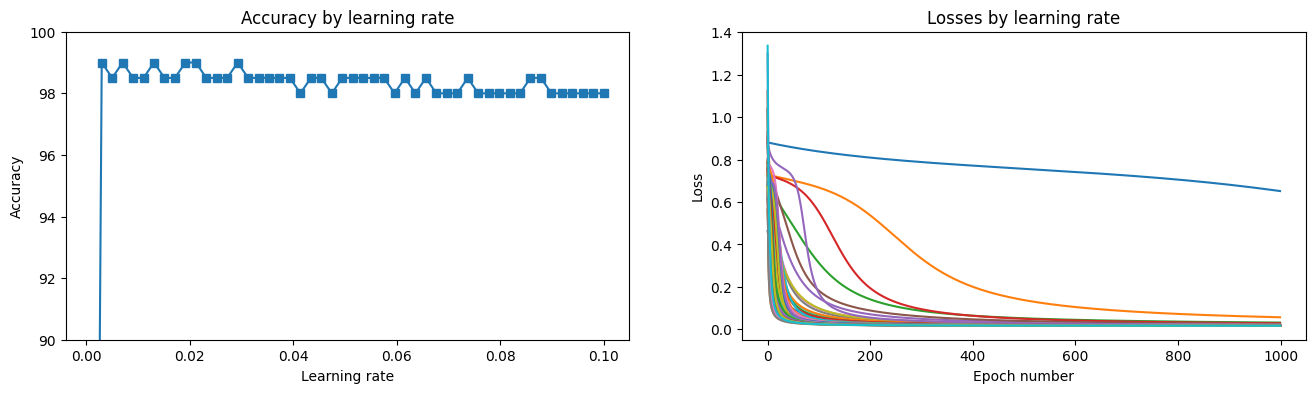

In [21]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')
# set y axix limits
ax[0].set_ylim([90,100])

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [22]:
accByLR

[tensor(50.),
 tensor(99.),
 tensor(98.5000),
 tensor(99.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(99.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(99.),
 tensor(99.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(99.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.)]

In [23]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9800)

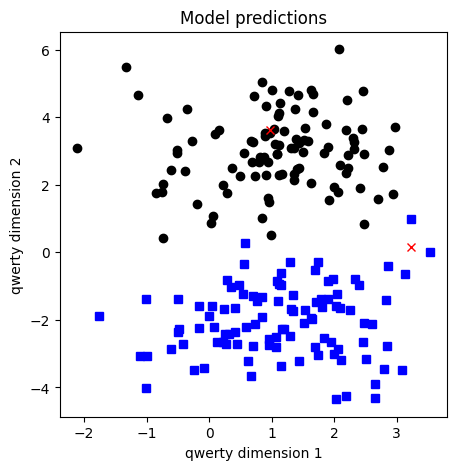

In [24]:
# Plot the model predictions
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(predictions>.5)[0],0],data[np.where(predictions>.5)[0],1],'bs')
plt.plot(data[np.where(predictions<=.5)[0],0],data[np.where(predictions<=.5)[0],1],'ko')

# show errors
plt.plot(data[np.where(predictions>.5)!=labels.squeeze(),0],data[np.where(predictions>.5)!=labels.squeeze(),1],'rx')

plt.title('Model predictions')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


# Additional explorations

In [25]:
# 1) The code creates a model with 16 hidden units. Notice where the two "16"s appear when constructing the model. 
#    Recreate the model using 32 hidden units. Does that help with the issue of models getting stuck in local minima?
# 
# 2) Adjust the code to create two hidden layers. The first hidden layer should have 16 hidden units and the second 
#    hidden layer shuold have 32 units. What needs to change in the code to make the numbers match to prevent coding errors?
# 